In [1]:
from IPython.core.pylabtools import figsize
from dotenv import load_dotenv
import os

from matplotlib.pyplot import title
from numpy.f2py.cb_rules import cb_map
from scipy.ndimage import label

load_dotenv()
import numpy as np
import pandas as pd
import pandas_datareader as pdr


#TIINGO_API_KEY = os.getenv("TIINGO_APIKEY")
#ALPHA_VANTAGE_APIKEY = os.getenv("ALPHA_VANTAGE_APIKEY")



In [25]:
eth_df = pd.read_csv("crypto/ETH.csv")

In [26]:
eth_df.info()
eth_df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3752 non-null   object 
 1   ticker  3752 non-null   object 
 2   open    3752 non-null   float64
 3   high    3752 non-null   float64
 4   low     3752 non-null   float64
 5   close   3752 non-null   float64
 6   volume  3752 non-null   float64
dtypes: float64(5), object(2)
memory usage: 205.3+ KB


,date,ticker,open,high,low,close,volume
3742,2025-11-05,ETH,3292.148163,3479.809544,3170.514010,3425.171230,4.695588e+10
3743,2025-11-06,ETH,3425.360992,3454.335946,3245.281645,3312.257813,3.673185e+10
3744,2025-11-07,ETH,3312.029297,3471.805015,3195.896661,3435.301136,4.260999e+10
3745,2025-11-08,ETH,3435.147454,3482.268350,3357.713198,3400.375960,2.361387e+10
3746,2025-11-09,ETH,3400.098538,3616.437015,3359.717480,3582.621385,2.882154e+10
3747,2025-11-10,ETH,3583.444713,3656.148953,3508.985948,3568.459946,3.563805e+10
3748,2025-11-11,ETH,3568.472700,3644.528338,3404.861825,3415.282290,3.973469e+10
3749,2025-11-12,ETH,3415.795889,3586.013922,3373.711555,3413.094229,3.489896e+10
3750,2025-11-13,ETH,3412.994912,3561.860791,3156.030873,3232.757094,5.028342e+10
3751,2025-11-14,ETH,3232.295128,3252.660922,3071.970716,3103.785613,4.700381e+10


In [27]:
eth_df.index

RangeIndex(start=0, stop=3752, step=1)

In [28]:
eth_df['AdjClose'] = eth_df['close']

In [29]:
eth_df['Simple_Return'] = eth_df['AdjClose'].pct_change()
eth_df['Log_Return'] = np.log(eth_df['AdjClose']/eth_df['AdjClose'].shift(1))

In [30]:
eth_df.head()

,date,ticker,open,high,low,close,volume,AdjClose,Simple_Return,Log_Return
0,2015-08-08,ETH,2.793760,2.798810,0.714725,0.753325,674188.0,0.753325,NaN,NaN
1,2015-08-09,ETH,0.706136,0.879810,0.629191,0.701897,532170.0,0.701897,-0.068268,-0.070710
2,2015-08-10,ETH,0.713989,0.729854,0.636546,0.708448,405283.0,0.708448,0.009333,0.009290
3,2015-08-11,ETH,0.708087,1.131410,0.663235,1.067860,1463100.0,1.067860,0.507323,0.410335
4,2015-08-12,ETH,1.058750,1.289940,0.883608,1.217440,2150620.0,1.217440,0.140075,0.131094


#### Set date as datetime index columsn


In [51]:
eth_df.index = pd.to_datetime(eth_df.date)

#### Create rolling features
- Rollimg mean - mean of AdjClose over 20 days
- Rolling Volatility - std of log return for a given window(20 days)

In [52]:
eth_df['MA_20'] = eth_df['AdjClose'].rolling(window=20).mean()
eth_df['Vol_20'] = eth_df['Log_Return'].rolling(window=20).std() * np.sqrt(365)

In [53]:
eth_df.index

DatetimeIndex(['2015-08-08', '2015-08-09', '2015-08-10', '2015-08-11',
               '2015-08-12', '2015-08-13', '2015-08-14', '2015-08-15',
               '2015-08-16', '2015-08-17',
               ...
               '2025-11-05', '2025-11-06', '2025-11-07', '2025-11-08',
               '2025-11-09', '2025-11-10', '2025-11-11', '2025-11-12',
               '2025-11-13', '2025-11-14'],
              dtype='datetime64[ns]', name='date', length=3752, freq=None)

In [54]:
eth_df.describe()

,open,high,low,close,volume,AdjClose,Simple_Return,Log_Return,MA_20,Vol_20
count,3752.000000,3752.000000,3752.000000,3752.000000,3.752000e+03,3752.000000,3751.000000,3751.000000,3733.000000,3732.000000
mean,1312.788591,1348.825126,1273.545358,1313.466746,1.157366e+10,1313.466746,0.003636,0.002219,1311.349643,0.882748
std,1322.022146,1356.783189,1283.843814,1321.993434,1.240050e+10,1321.993434,0.053719,0.053045,1312.399200,0.449419
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05,0.434829,-0.423472,-0.550732,0.568665,0.139166
25%,172.275270,176.621938,167.709083,172.598748,1.581323e+09,172.598748,-0.020555,-0.020769,177.898340,0.574203
50%,707.399506,740.182007,682.445496,707.604004,8.408140e+09,707.604004,0.000436,0.000436,712.532098,0.770711
75%,2322.244239,2389.082513,2242.817627,2325.140826,1.692070e+10,2325.140826,0.024198,0.023909,2350.315173,1.062161
max,4831.088203,4953.732914,4718.039256,4831.348723,9.773662e+10,4831.348723,0.507323,0.410335,4531.545317,3.101629


In [55]:
print(f"Skewness of AdjClose: {eth_df['AdjClose'].skew()}")
print(f"Kurtosis of AdjClose: {eth_df['AdjClose'].kurt()}")

# positive skew indicates right tailed distribution

Skewness of AdjClose: 0.7339966958932138
Kurtosis of AdjClose: -0.711761723755735


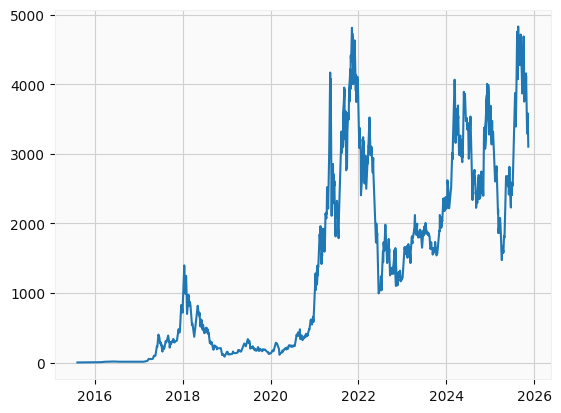

In [56]:
import matplotlib.pyplot as plt
import mplfinance as mpf

plt.plot(eth_df.index, eth_df['AdjClose'])

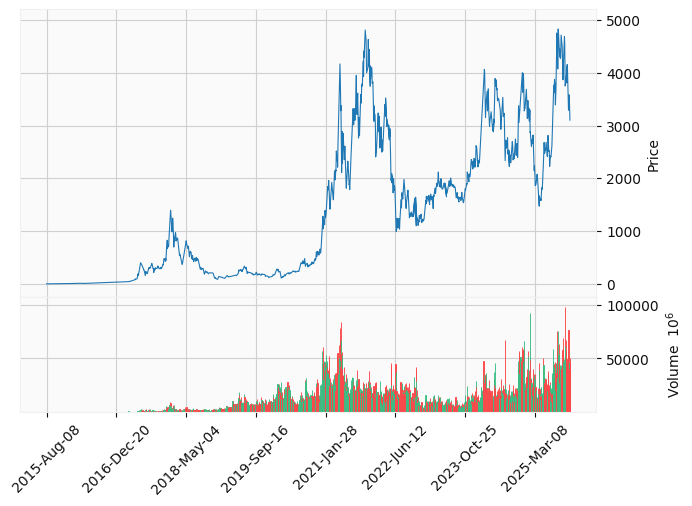

In [57]:
mpf.plot(
    eth_df,
    type='line',
    style='yahoo',
    volume=True
)

<Axes: xlabel='Simple_Return', ylabel='Count'>

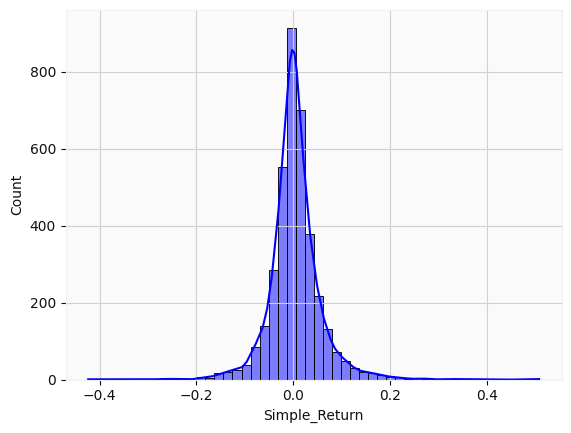

In [58]:
import seaborn as sns

sns.histplot(eth_df['Simple_Return'].dropna(), bins=50, kde=True, color='blue')

<Axes: >

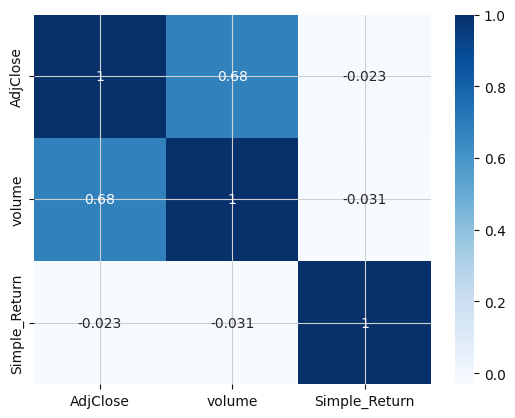

In [59]:
subset = eth_df[['AdjClose','volume', 'Simple_Return']].dropna()
corr_matrix = subset.corr()

sns.heatmap(corr_matrix, annot=True, cmap='Blues')

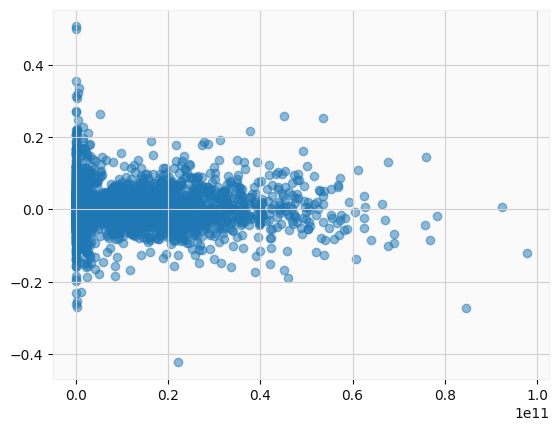

In [60]:
plt.scatter(eth_df['volume'], eth_df['Simple_Return'], alpha=0.5)

#### Test for Stationarity
- Augmented Dickey-Fuller(ADF) TEst



In [65]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(eth_df["Log_Return"].dropna())
print(f"ADF stat = {result[0]}")
print(f"p-valeu = {result[1]}")

ADF stat = -11.579848416586636
p-valeu = 2.961051479698807e-21


- Since p-value is <0.05  we can reject null hypothesis and confirm that the data is likely stationary
- Plot mean and std values for visual confirmation


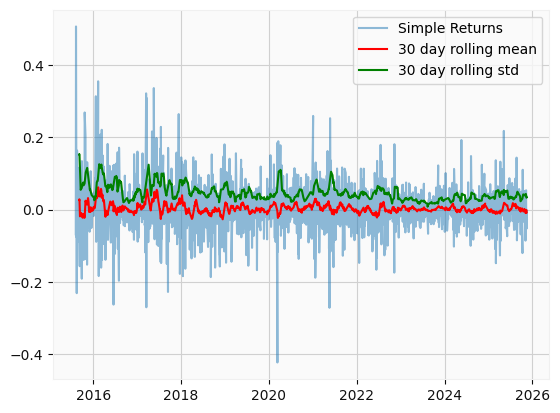

In [66]:
roll_mean = eth_df['Simple_Return'].rolling(window=30).mean()
roll_std = eth_df['Simple_Return'].rolling(window=30).std()

plt.plot(eth_df['Simple_Return'], label="Simple Returns", alpha=0.5)
plt.plot(roll_mean, label="30 day rolling mean", color='red')
plt.plot(roll_std, label="30 day rolling std", color='green')
plt.legend()

#### ACF and PACF

- Now we can compute ACF and PACF
- The ACF measures how realted a time series is with its own past values


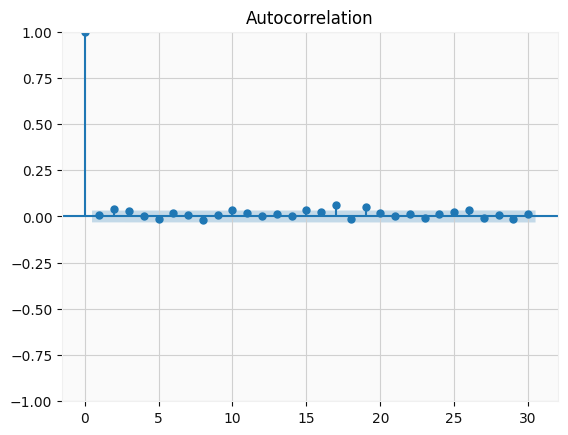

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(eth_df['Log_Return'].dropna(), lags=30)
plt.title("Autocorrelation")
plt.show()

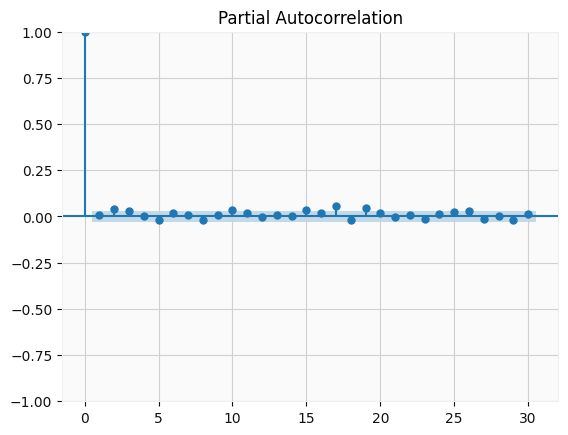

In [68]:
plot_pacf(eth_df['Log_Return'].dropna(), lags=30)
plt.title("Partial Autocorrelation")
plt.show()

**There are no spikes at lag=1 in both ACF and PACF. So, we cannot model this timeseries using ARIMA**

#### Check for volatility clustering

- Test if volatility is predictable by doing ACF and PACF on squared log returns
- If we observe ARCH kind of plot we can use GARCH model

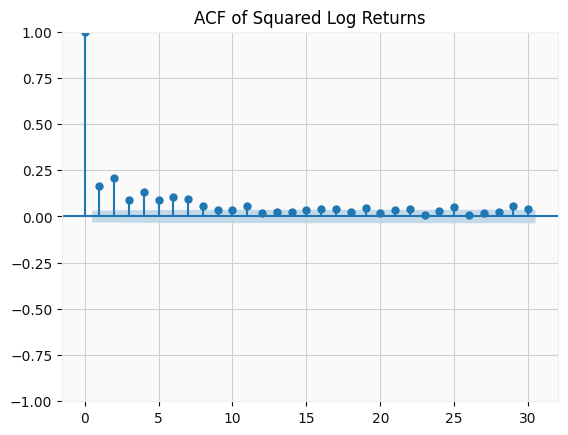

In [71]:
# Create a new column for squared log returns
eth_df['Squared_Log_Return'] = eth_df['Log_Return'].dropna().pow(2)

# Now, plot the ACF and PACF of this new column
plot_acf(eth_df['Squared_Log_Return'].dropna(), lags=30)
plt.title("ACF of Squared Log Returns")
plt.show()

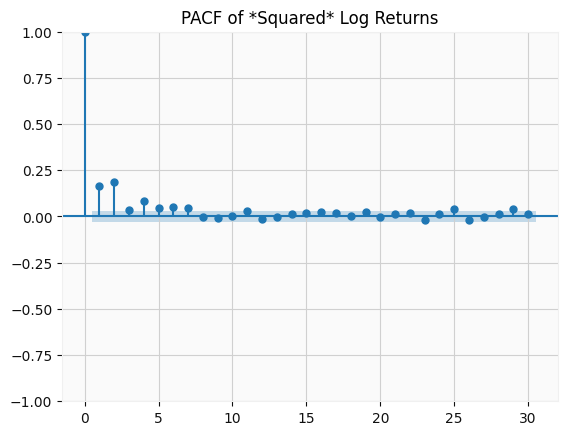

In [72]:
plot_pacf(eth_df['Squared_Log_Return'].dropna(), lags=30)
plt.title("PACF of *Squared* Log Returns")
plt.show()

In [73]:
from arch import arch_model

# multiple Log_Return by 100 for better convergence
returns_for_garch = eth_df['Log_Return'].dropna()*100

# GARCH 1,1
model = arch_model(returns_for_garch, vol='Garch', p=1, q=1, dist='normal')
garch_results = model.fit(update_freq=5)

print(garch_results.summary())

Iteration:      5,   Func. Count:     38,   Neg. LLF: 11109.536438653806
Iteration:     10,   Func. Count:     62,   Neg. LLF: 11109.48907134786
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11109.48907134695
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11109.5
Distribution:                  Normal   AIC:                           22227.0
Method:            Maximum Likelihood   BIC:                           22251.9
                                        No. Observations:                 3751
Date:                Sat, Nov 15 2025   Df Residuals:                     3750
Time:         

- p-value for alpha[1] and beta[1] is less than 0.05. 
This indiactes GARCH baseline is statistically significant

Mean Model Analysis (mu)
coef: 0.1477

P>|t|: 0.03391 (or 3.391e-02)

- Interpretation: The p-value is less than 0.05, which means the mean return (mu) is statistically significant and not zero. Your data has a small, positive daily drift (a slight upward trend) on average. This is good to know, but it's not the main story.

- Volatility Model Analysis (The Main Story)

alpha[1] (The ARCH Term):

coef: 0.1206

P>|t|: 0.001323 (or 1.323e-03)

Interpretation: This is highly significant. It confirms the "ARCH effect." It means that yesterday's market shock (the squared return) has a direct, predictable impact on today's volatility.

beta[1] (The GARCH Term):

coef: 0.8440

P>|t|: 8.710e-59 (extremely small)

Interpretation: This is extremely significant. It confirms the "GARCH effect." It means that yesterday's forecasted variance is the single biggest predictor of today's variance.

📈 The Key Takeaway: Volatility Persistence

alpha[1] + beta[1] = 0.1206 + 0.8440 = 0.9646

This value is very close to 1. This is the volatility persistence, and it's a classic finding.

What this means: Volatility is highly "sticky" or "persistent." When a high-volatility event (a market shock) occurs, it doesn't just disappear. That shock will "reverberate" and keep volatility high for many days and weeks to come.

In [74]:
# creating GATCH feature: using GARCH model's own best guess of the next day's volatility

eth_df['GARCH_volatility'] = garch_results.conditional_volatility

In [75]:
eth_df.head()

,date,ticker,open,high,low,close,volume,AdjClose,Simple_Return,Log_Return,MA_20,Vol_20,Squared_Log_Return,GARCH_volatility
date,,,,,,,,,,,,,,
2015-08-08,2015-08-08,ETH,2.793760,2.798810,0.714725,0.753325,674188.0,0.753325,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-09,2015-08-09,ETH,0.706136,0.879810,0.629191,0.701897,532170.0,0.701897,-0.068268,-0.070710,NaN,NaN,0.005000,15.351113
2015-08-10,2015-08-10,ETH,0.713989,0.729854,0.636546,0.708448,405283.0,0.708448,0.009333,0.009290,NaN,NaN,0.000086,14.361335
2015-08-11,2015-08-11,ETH,0.708087,1.131410,0.663235,1.067860,1463100.0,1.067860,0.507323,0.410335,NaN,NaN,0.168375,13.236911
2015-08-12,2015-08-12,ETH,1.058750,1.289940,0.883608,1.217440,2150620.0,1.217440,0.140075,0.131094,NaN,NaN,0.017186,18.724322


In [76]:
import pandas_ta as ta

eth_df['RSI'] = ta.rsi(eth_df['AdjClose'], length=14)

In [77]:
eth_df.head()

,date,ticker,open,high,low,close,volume,AdjClose,Simple_Return,Log_Return,MA_20,Vol_20,Squared_Log_Return,GARCH_volatility,RSI
date,,,,,,,,,,,,,,,
2015-08-08,2015-08-08,ETH,2.793760,2.798810,0.714725,0.753325,674188.0,0.753325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-09,2015-08-09,ETH,0.706136,0.879810,0.629191,0.701897,532170.0,0.701897,-0.068268,-0.070710,NaN,NaN,0.005000,15.351113,0.000000
2015-08-10,2015-08-10,ETH,0.713989,0.729854,0.636546,0.708448,405283.0,0.708448,0.009333,0.009290,NaN,NaN,0.000086,14.361335,0.970349
2015-08-11,2015-08-11,ETH,0.708087,1.131410,0.663235,1.067860,1463100.0,1.067860,0.507323,0.410335,NaN,NaN,0.168375,13.236911,37.057039
2015-08-12,2015-08-12,ETH,1.058750,1.289940,0.883608,1.217440,2150620.0,1.217440,0.140075,0.131094,NaN,NaN,0.017186,18.724322,45.893823


In [78]:
# Bollinger Bands
eth_df.ta.bbands(close='AdjClose', append=True)

,BBL_5_2.0_2.0,BBM_5_2.0_2.0,BBU_5_2.0_2.0,BBB_5_2.0_2.0,BBP_5_2.0_2.0
date,,,,,
2015-08-08,NaN,NaN,NaN,NaN,NaN
2015-08-09,NaN,NaN,NaN,NaN,NaN
2015-08-10,NaN,NaN,NaN,NaN,NaN
2015-08-11,NaN,NaN,NaN,NaN,NaN
2015-08-12,0.414531,0.889794,1.365057,106.825383,0.844700
...,...,...,...,...,...
2025-11-10,3230.037750,3459.803248,3689.568746,13.281998,0.736451
2025-11-11,3304.675859,3480.408143,3656.140428,10.098372,0.314702
2025-11-12,3293.539441,3475.966762,3658.394083,10.496494,0.327678


In [80]:
# MACD

eth_df.ta.macd(close='AdjClose', append=True)

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
date,,,
2015-08-08,NaN,NaN,NaN
2015-08-09,NaN,NaN,NaN
2015-08-10,NaN,NaN,NaN
2015-08-11,NaN,NaN,NaN
2015-08-12,NaN,NaN,NaN
...,...,...,...
2025-11-10,-163.681527,-11.099040,-152.582487
2025-11-11,-165.529580,-10.357675,-155.171906
2025-11-12,-165.265654,-8.074999,-157.190655


In [81]:
eth_df

,date,ticker,open,high,low,close,volume,AdjClose,Simple_Return,Log_Return,...,GARCH_volatility,RSI,BBL_5_2.0_2.0,BBM_5_2.0_2.0,BBU_5_2.0_2.0,BBB_5_2.0_2.0,BBP_5_2.0_2.0,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
date,,,,,,,,,,,,,,,,,,,,,
2015-08-08,2015-08-08,ETH,2.793760,2.798810,0.714725,0.753325,6.741880e+05,0.753325,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-09,2015-08-09,ETH,0.706136,0.879810,0.629191,0.701897,5.321700e+05,0.701897,-0.068268,-0.070710,...,15.351113,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-10,2015-08-10,ETH,0.713989,0.729854,0.636546,0.708448,4.052830e+05,0.708448,0.009333,0.009290,...,14.361335,0.970349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-11,2015-08-11,ETH,0.708087,1.131410,0.663235,1.067860,1.463100e+06,1.067860,0.507323,0.410335,...,13.236911,37.057039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-12,2015-08-12,ETH,1.058750,1.289940,0.883608,1.217440,2.150620e+06,1.217440,0.140075,0.131094,...,18.724322,45.893823,0.414531,0.889794,1.365057,106.825383,0.844700,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10,2025-11-10,ETH,3583.444713,3656.148953,3508.985948,3568.459946,3.563805e+10,3568.459946,-0.003953,-0.003961,...,4.646038,43.291811,3230.037750,3459.803248,3689.568746,13.281998,0.736451,-163.681527,-11.099040,-152.582487
2025-11-11,2025-11-11,ETH,3568.472700,3644.528338,3404.861825,3415.282290,3.973469e+10,3415.282290,-0.042925,-0.043874,...,4.396551,39.166825,3304.675859,3480.408143,3656.140428,10.098372,0.314702,-165.529580,-10.357675,-155.171906
2025-11-12,2025-11-12,ETH,3415.795889,3586.013922,3373.711555,3413.094229,3.489896e+10,3413.094229,-0.000641,-0.000641,...,4.457686,39.109499,3293.539441,3475.966762,3658.394083,10.496494,0.327678,-165.265654,-8.074999,-157.190655


In [82]:
eth_df.columns

Index(['date', 'ticker', 'open', 'high', 'low', 'close', 'volume', 'AdjClose',
       'Simple_Return', 'Log_Return', 'MA_20', 'Vol_20', 'Squared_Log_Return',
       'GARCH_volatility', 'RSI', 'BBL_5_2.0_2.0', 'BBM_5_2.0_2.0',
       'BBU_5_2.0_2.0', 'BBB_5_2.0_2.0', 'BBP_5_2.0_2.0', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9'],
      dtype='object')

### Creating Relevant Features

- From here, feature engineering becomes less about adding new indicators and more about creating features that capture relationships, time, and market context for the LSTM.
- Right now, your LSTM will only see the features for one day at a time (t). To find patterns, it needs to see the features from the recent past (t-1, t-2, etc.).
- Creating laged versions explicitly gives the model the "lookback" window it needs. Instead of just one value for RSI, it sees the sequence of the last 5 days of RSI, which tells it about momentum's direction and acceleration.

In [83]:
# 1. Creating Lagged features
features_to_lag = ['Log_Return', 'GARCH_volatility', 'RSI', 'MACDh_12_26_9', 'BBP_5_2.0_2.0']

for feature in features_to_lag:
    for i in range(1, 6): # Create 5 lags
        eth_df[f'{feature}_lag_{i}'] = eth_df[feature].shift(i)

#### Interaction and RAtio Features(Contextualizing Price)

- Price vs moving average: how far is the price from its recent trend?
- Price vs bollinger bands: This is what BBP_5_2.0_2.0 (%B) feature already does. It shows where the price is relative to the bands (e.g., 0 = at lower band, 1 = at upper band).
- Volatility Interaction: Is momentum high when volatility is also high?

In [84]:
eth_df['Price_vs_MA20'] = eth_df['AdjClose']/eth_df['MA_20']
eth_df['RSI_x_GARCH_vol'] = eth_df['RSI']* eth_df['GARCH_volatility']

#### Cyclical features(time-based)
- Crypto markets are 24/7, but they are still driven by humans who operate on weekly schedules
- There might be a "day-of-week" effect (e.g., more volatility on Mondays, lower volume on Saturdays)


In [85]:
eth_df['date'] = pd.to_datetime(eth_df['date'])
eth_df['day_of_week'] = eth_df['date'].dt.dayofweek
eth_df['month_of_year'] = eth_df['date'].dt.month

In [87]:
# better to convert these cyclical features using sine/cosine transformations so that December 12 and January 1 are seen as close to each other
eth_df['month_sin'] = np.sin(2 * np.pi * eth_df['month_of_year'] / 12)
eth_df['month_cos'] = np.cos(2 * np.pi * eth_df['month_of_year'] / 12)


#### Market Regime Features

- binary feature that tells the model what "state" the market is in. This can help the LSTM learn that its rules should be different during a panic versus a calm period.
- Price action in a high-volatility "bear" market is fundamentally different from a low-volatility "bull" market.

In [88]:
# Define a high-volatility regime as any day where GARCH vol is in the top 25%
vol_threshold = eth_df['GARCH_volatility'].quantile(0.75)

eth_df['is_high_vol_regime'] = (eth_df['GARCH_volatility'] > vol_threshold).astype(int)

In [90]:
eth_df.head()

,date,ticker,open,high,low,close,volume,AdjClose,Simple_Return,Log_Return,...,BBP_5_2.0_2.0_lag_3,BBP_5_2.0_2.0_lag_4,BBP_5_2.0_2.0_lag_5,Price_vs_MA20,RSI_x_GARCH_vol,day_of_week,month_of_year,month_sin,month_cos,is_high_vol_regime
date,,,,,,,,,,,,,,,,,,,,,
2015-08-08,2015-08-08,ETH,2.793760,2.798810,0.714725,0.753325,674188.0,0.753325,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,8,-0.866025,-0.5,0
2015-08-09,2015-08-09,ETH,0.706136,0.879810,0.629191,0.701897,532170.0,0.701897,-0.068268,-0.070710,...,NaN,NaN,NaN,NaN,0.000000,6,8,-0.866025,-0.5,1
2015-08-10,2015-08-10,ETH,0.713989,0.729854,0.636546,0.708448,405283.0,0.708448,0.009333,0.009290,...,NaN,NaN,NaN,NaN,13.935510,0,8,-0.866025,-0.5,1
2015-08-11,2015-08-11,ETH,0.708087,1.131410,0.663235,1.067860,1463100.0,1.067860,0.507323,0.410335,...,NaN,NaN,NaN,NaN,490.520729,1,8,-0.866025,-0.5,1
2015-08-12,2015-08-12,ETH,1.058750,1.289940,0.883608,1.217440,2150620.0,1.217440,0.140075,0.131094,...,NaN,NaN,NaN,NaN,859.330710,2,8,-0.866025,-0.5,1


In [92]:
# clean up the dataframe
eth_df.replace([np.inf, -np.inf], np.nan, inplace=True)

eth_df.dropna(inplace=True)
print(f"Shape after cleaning: {eth_df.shape}")
nan_count = eth_df.isnull().sum().sum()
print(f"Total remaining NaNs: {nan_count}")

if nan_count > 0:
    print("Warning: NaNs still present!")

Shape after cleaning: (3714, 55)
Total remaining NaNs: 0


In [93]:
eth_df.tail()

,date,ticker,open,high,low,close,volume,AdjClose,Simple_Return,Log_Return,...,BBP_5_2.0_2.0_lag_3,BBP_5_2.0_2.0_lag_4,BBP_5_2.0_2.0_lag_5,Price_vs_MA20,RSI_x_GARCH_vol,day_of_week,month_of_year,month_sin,month_cos,is_high_vol_regime
date,,,,,,,,,,,,,,,,,,,,,
2025-11-10,2025-11-10,ETH,3583.444713,3656.148953,3508.985948,3568.459946,3.563805e+10,3568.459946,-0.003953,-0.003961,...,0.544041,0.308475,0.319608,0.954495,201.135411,0,11,-0.5,0.866025,0
2025-11-11,2025-11-11,ETH,3568.472700,3644.528338,3404.861825,3415.282290,3.973469e+10,3415.282290,-0.042925,-0.043874,...,0.602926,0.544041,0.308475,0.918348,172.198929,1,11,-0.5,0.866025,0
2025-11-12,2025-11-12,ETH,3415.795889,3586.013922,3373.711555,3413.094229,3.489896e+10,3413.094229,-0.000641,-0.000641,...,0.888124,0.602926,0.544041,0.923257,174.337857,2,11,-0.5,0.866025,0
2025-11-13,2025-11-13,ETH,3412.994912,3561.860791,3156.030873,3232.757094,5.028342e+10,3232.757094,-0.052837,-0.054284,...,0.736451,0.888124,0.602926,0.882856,146.246404,3,11,-0.5,0.866025,0
2025-11-14,2025-11-14,ETH,3232.295128,3252.660922,3071.970716,3103.785613,4.700381e+10,3103.785613,-0.039895,-0.040713,...,0.314702,0.736451,0.888124,0.857584,141.823728,4,11,-0.5,0.866025,0


### Data Prep for LSTM

1. Defining X and y
2. Split data chronologically: we cannot use train_test_split since it will destry the temporal order
3. Scaling features
4. Createing sliding windows: sequnetial data

**Prepare this 2D dataframe for the LSTM, which expects data in a 3D shape: (samples, timesteps, features).**


In [152]:
#1. 
# # We use .shift(-1) to make the target for row 't' be the log_return from row 't+1'.
"""
y = eth_df['Log_Return'].shift(-1), this was first model target 
1. LSTM model was adding more eerror because of the noise than capturing the signal. naive RSME value > LSTMs RMSE
2.  A complex, feature-rich LSTM model, when optimized to reduce statistical error (RMSE), performs worse than a "naive" model that just predicts the long-term average return.
3.  The daily log return is almost pure, unpredictable noise. The "signal" is so weak (or non-existent) that your LSTM, in its attempt to chase this noise, added error. The "smarter" Naive model, by doing nothing, performed better.
4. so i changes the regression problem to classification.
5. i am finding out whether it can predict direction
"""

# 1 if the next day's return was positive, 0 otherwise
y = (eth_df['Log_Return'].shift(-1) > 0).astype(int)

drop_features = [
    'date', 'ticker', 'open', 'high', 'low', 'close', 'volume', 'AdjClose',
    'Simple_Return', 'Log_Return', 'Squared_Log_Return', # Target-related columns
]

X = eth_df.drop(columns=drop_features)

# Because we shifted y, the last row of X has no corresponding y.
# So, we drop the last row of X and the last (now NaN) row of y.
X = X.iloc[:-1]
y = y.iloc[:-1]

y = y.to_frame(name='Target_Direction')

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (3713, 44)
Shape of y: (3713, 1)


In [153]:
eth_df.head()

,date,ticker,open,high,low,close,volume,AdjClose,Simple_Return,Log_Return,...,BBP_5_2.0_2.0_lag_3,BBP_5_2.0_2.0_lag_4,BBP_5_2.0_2.0_lag_5,Price_vs_MA20,RSI_x_GARCH_vol,day_of_week,month_of_year,month_sin,month_cos,is_high_vol_regime
date,,,,,,,,,,,,,,,,,,,,,
2015-09-15,2015-09-15,ETH,0.875189,1.045540,0.875189,0.944410,703390.0,0.944410,0.078559,0.075626,...,0.301371,0.073284,0.161923,0.798364,279.496317,1,9,-1.0,-1.836970e-16,1
2015-09-16,2015-09-16,ETH,0.941977,0.952698,0.901639,0.907175,615593.0,0.907175,-0.039427,-0.040225,...,0.220890,0.301371,0.073284,0.774764,265.821493,2,9,-1.0,-1.836970e-16,1
2015-09-17,2015-09-17,ETH,0.906865,0.909204,0.831132,0.874231,897940.0,0.874231,-0.036315,-0.036991,...,0.218988,0.220890,0.301371,0.756879,243.239672,3,9,-1.0,-1.836970e-16,1
2015-09-18,2015-09-18,ETH,0.874574,0.888102,0.833908,0.853685,484622.0,0.853685,-0.023502,-0.023782,...,0.453849,0.218988,0.220890,0.749764,225.444034,4,9,-1.0,-1.836970e-16,1
2015-09-19,2015-09-19,ETH,0.849603,0.911883,0.833784,0.882391,386988.0,0.882391,0.033626,0.033073,...,0.364429,0.453849,0.218988,0.790134,226.486451,5,9,-1.0,-1.836970e-16,1


In [161]:
# 2.data prep
n = len(X)
train_split = int(n * 0.70)
val_split = int(n * 0.85) # 70% + 15%

# Split X
X_train = X.iloc[:train_split]
X_val = X.iloc[train_split:val_split]
X_test = X.iloc[val_split:]

# Split y
y_train = y.iloc[:train_split]
y_val = y.iloc[train_split:val_split]
y_test = y.iloc[val_split:]

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape},   y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape},  y_test:  {y_test.shape}")


print("--- Training Set Balance ---")
balance = y_train['Target_Direction'].value_counts(normalize=True)
print(balance) # there is no class imbalance

X_train: (2599, 44), y_train: (2599, 1)
X_val:   (557, 44),   y_val:   (557, 1)
X_test:  (557, 44),  y_test:  (557, 1)
--- Training Set Balance ---
Target_Direction
1    0.508272
0    0.491728
Name: proportion, dtype: float64


In [162]:
# 3. LSTMs are sensitive to scaled of the input data. 
# one important thing is to fit the scaler only on the training data(X_train) and then use that same fitted scaler to transform validation and test sets


from sklearn.preprocessing import MinMaxScaler
# --- 1. Scale Features (X) ---
# We use MinMaxScaler to scale data between 0 and 1
x_scaler = MinMaxScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_val_scaled = x_scaler.transform(X_val)
X_test_scaled = x_scaler.transform(X_test)

# --- 2. Scale Target (y) ---
# It's also good practice to scale the target variable
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)


In [163]:
# 4. creating sliding window
import numpy as np

def create_sequences(X_data, y_data, n_steps):
    """
    Converts 2D feature/target arrays into 3D sequence arrays for an LSTM.
    """
    X_seq, y_seq = [], []
    for i in range(len(X_data) - n_steps):
        # Find the end of this pattern
        end_ix = i + n_steps
        
        # Gather input and output parts of the pattern
        seq_x = X_data[i:end_ix, :] # Selects 'n_steps' rows of features
        seq_y = y_data[end_ix, 0]   # Selects the 1 target value after the sequence
        
        X_seq.append(seq_x)
        y_seq.append(seq_y)
        
    return np.array(X_seq), np.array(y_seq)

# Define how many past days you want to use for prediction
n_steps = 60 # This is a key hyperparameter. we are choosing 30 previous days

# Create the 3D sequence datasets
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, n_steps)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_scaled, n_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, n_steps)


print("--- Final 3D Shapes ---")
print(f"X_train_seq: {X_train_seq.shape}") # Should be (samples, 30, n_features)
print(f"y_train_seq: {y_train_seq.shape}") # Should be (samples,)

print(f"X_val_seq: {X_val_seq.shape}")
print(f"y_val_seq: {y_val_seq.shape}")

print(f"X_test_seq: {X_test_seq.shape}")
print(f"y_test_seq: {y_test_seq.shape}")


--- Final 3D Shapes ---
X_train_seq: (2539, 60, 44)
y_train_seq: (2539,)
X_val_seq: (497, 60, 44)
y_val_seq: (497,)
X_test_seq: (497, 60, 44)
y_test_seq: (497,)


### Build LSTM architecture

In [157]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

N_FEATURES=44
N_STEPS=60

y_train_for_scaler = y_train_seq.reshape(-1, 1) # Scaler expects 2D
y_scaler.fit(y_train_for_scaler) # we are using the previous fitted y_scaler only
print("--- Data Shapes ---")
print(f"X_train_seq: {X_train_seq.shape}, y_train_seq: {y_train_seq.shape}")
print(f"X_val_seq: {X_val_seq.shape}, y_val_seq: {y_val_seq.shape}")
print(f"X_test_seq: {X_test_seq.shape}, y_test_seq: {y_test_seq.shape}")
print("-" * 30)


--- Data Shapes ---
X_train_seq: (2539, 60, 44), y_train_seq: (2539,)
X_val_seq: (497, 60, 44), y_val_seq: (497,)
X_test_seq: (497, 60, 44), y_test_seq: (497,)
------------------------------


In [158]:
# 1. setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

Using cpu


In [159]:
# 2. Create Custom PyTorch Dataset
class StockDataset(Dataset):
    """
    Custom Dataset for time-series sequence data.
    """
    def __init__(self, X, y):
        # PyTorch is picky about data types. We need float32.
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        # We return the sequence and its corresponding target label
        return self.X[idx], self.y[idx]

In [160]:
# 3. Define the Stacked LSTM Model
class StackedLSTM(nn.Module):
    """
    A Stacked LSTM model with Dropout and a final Linear layer.
    """
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.2):
        super(StackedLSTM, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Define the LSTM layer
        # batch_first=True means input shape is (batch_size, seq_len, features)
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_prob if num_layers > 1 else 0 # Dropout only between layers
        )
        
        # Define a dropout layer for the output of LSTM
        self.dropout = nn.Dropout(dropout_prob)
        
        # Define the fully connected (Linear) layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        
        # Initialize hidden and cell states with zeros
        # Shape: (num_layers, batch_size, hidden_size)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Pass data through LSTM
        # out shape: (batch_size, seq_len, hidden_size)
        # h_n, c_n are the final hidden/cell states
        out, (h_n, c_n) = self.lstm(x, (h0, c0))
        
        # We only want the output of the *last* time step
        # out shape: (batch_size, hidden_size)
        out = out[:, -1, :]
        
        # Apply dropout
        out = self.dropout(out)
        logits = self.fc(out)
        
        # Pass through the fully connected layer
        # final_out shape: (batch_size, output_size)
        probability = torch.sigmoid(logits)
        
        return probability

In [ ]:
# 4.
INPUT_SIZE = X_train_seq.shape[2] # Number of features
HIDDEN_SIZE = 64                  # Number of neurons in LSTM hidden state
NUM_LAYERS = 2                    # Number of stacked LSTM layers
OUTPUT_SIZE = 1                   # We are predicting 1 value (Log_Return)
NUM_EPOCHS = 50                   # How many times to loop over the data
BATCH_SIZE = 64                   # Number of samples in each batch
LEARNING_RATE = 0.001
DROPOUT_PROB = 0.3

In [142]:
# 5. load datasets

train_dataset = StockDataset(X_train_seq, y_train_seq)
val_dataset = StockDataset(X_val_seq, y_val_seq)
test_dataset = StockDataset(X_test_seq, y_test_seq)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [143]:
# 6. initializing model, loss, and optimizer
model = StackedLSTM(
    input_size = INPUT_SIZE,
    hidden_size = HIDDEN_SIZE,
    num_layers = NUM_LAYERS,
    output_size = OUTPUT_SIZE
).to(device)

#criterion = nn.MSELoss() old
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

print(model)
print("-"*30)



StackedLSTM(
  (lstm): LSTM(44, 64, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
------------------------------


In [144]:
# ---7. The Training Loop ---
print("Starting Training...")
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(NUM_EPOCHS):
    # --- Training Phase ---
    model.train() # Set model to training mode (enables dropout)
    epoch_train_loss = 0
    
    for i, (X_batch, y_batch) in enumerate(train_loader):
        # Move data to the correct device
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # 1. Forward pass
        y_pred = model(X_batch)
        
        # y_pred is (batch, 1) but y_batch is (batch,). Need to match.
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        
        # 2. Backward pass and optimization
        optimizer.zero_grad() # Clear old gradients
        loss.backward()       # Calculate new gradients
        
        # Optional: Gradient Clipping to prevent exploding gradients
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()      # Update model weights
        
        epoch_train_loss += loss.item()
        
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

     # --- Validation Phase ---
    model.eval()
    epoch_val_loss = 0
    total_correct = 0
    total_samples = 0
    
    with torch.no_grad():
        for X_batch_val, y_batch_val in val_loader:
            X_batch_val, y_batch_val = X_batch_val.to(device), y_batch_val.to(device)
            
            y_pred_val_prob = model(X_batch_val)
            val_loss = criterion(y_pred_val_prob, y_batch_val.unsqueeze(1))
            epoch_val_loss += val_loss.item()
            
            # --- MODIFICATION: Calculate Accuracy ---
            # Convert probabilities to binary predictions (0 or 1)
            y_pred_val_class = (y_pred_val_prob > 0.5).float()
            
            # Count correct predictions
            total_samples += y_batch_val.size(0)
            total_correct += (y_pred_val_class == y_batch_val.unsqueeze(1)).sum().item()
            
    avg_val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    accuracy = 100 * total_correct / total_samples
    val_accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}, Val Acc: {accuracy:.2f}%')

print("Training finished.")
print("-" * 30)

Starting Training...
Epoch [1/50], Train Loss: 0.692971, Val Loss: 0.692441, Val Acc: 51.04%
Epoch [2/50], Train Loss: 0.692801, Val Loss: 0.693565, Val Acc: 50.28%
Epoch [3/50], Train Loss: 0.694037, Val Loss: 0.692383, Val Acc: 51.04%
Epoch [4/50], Train Loss: 0.692802, Val Loss: 0.692665, Val Acc: 51.04%
Epoch [5/50], Train Loss: 0.692907, Val Loss: 0.692599, Val Acc: 51.04%
Epoch [6/50], Train Loss: 0.692916, Val Loss: 0.692683, Val Acc: 51.23%
Epoch [7/50], Train Loss: 0.692720, Val Loss: 0.692575, Val Acc: 51.61%
Epoch [8/50], Train Loss: 0.692778, Val Loss: 0.692333, Val Acc: 49.91%
Epoch [9/50], Train Loss: 0.692717, Val Loss: 0.692298, Val Acc: 51.80%
Epoch [10/50], Train Loss: 0.691791, Val Loss: 0.692355, Val Acc: 51.23%
Epoch [11/50], Train Loss: 0.691759, Val Loss: 0.692479, Val Acc: 51.42%
Epoch [12/50], Train Loss: 0.691910, Val Loss: 0.692131, Val Acc: 50.28%
Epoch [13/50], Train Loss: 0.691468, Val Loss: 0.692103, Val Acc: 50.47%
Epoch [14/50], Train Loss: 0.690790, Va

In [145]:
# --- 8. Final Evaluation on Test Set ---
from sklearn.metrics import classification_report, confusion_matrix
print("Evaluating on Test Set...")
model.eval()

all_preds_class = []
all_true_class = []

with torch.no_grad():
    for X_batch_test, y_batch_test in test_loader:
        X_batch_test = X_batch_test.to(device)
        
        # Get probability
        y_pred_test_prob = model(X_batch_test)
        
        # Convert probability to class
        y_pred_test_class = (y_pred_test_prob > 0.5).float()
        
        all_preds_class.extend(y_pred_test_class.cpu().numpy())
        all_true_class.extend(y_batch_test.numpy())

# Flatten the lists (since they are now 1D)
all_preds_class = np.array(all_preds_class).flatten()
all_true_class = np.array(all_true_class).flatten()

# --- 9. Classification Metrics ---
print("--- Classification Report ---")
# 0 = Down Day, 1 = Up Day
target_names = ['Down Day (0)', 'Up Day (1)']
print(classification_report(all_true_class, all_preds_class, target_names=target_names))

print("--- Confusion Matrix ---")
cm = confusion_matrix(all_true_class, all_preds_class)
print(cm)

Evaluating on Test Set...
--- Classification Report ---
              precision    recall  f1-score   support

Down Day (0)       0.52      0.66      0.58       261
  Up Day (1)       0.55      0.40      0.46       266

    accuracy                           0.53       527
   macro avg       0.53      0.53      0.52       527
weighted avg       0.53      0.53      0.52       527

--- Confusion Matrix ---
[[172  89]
 [159 107]]


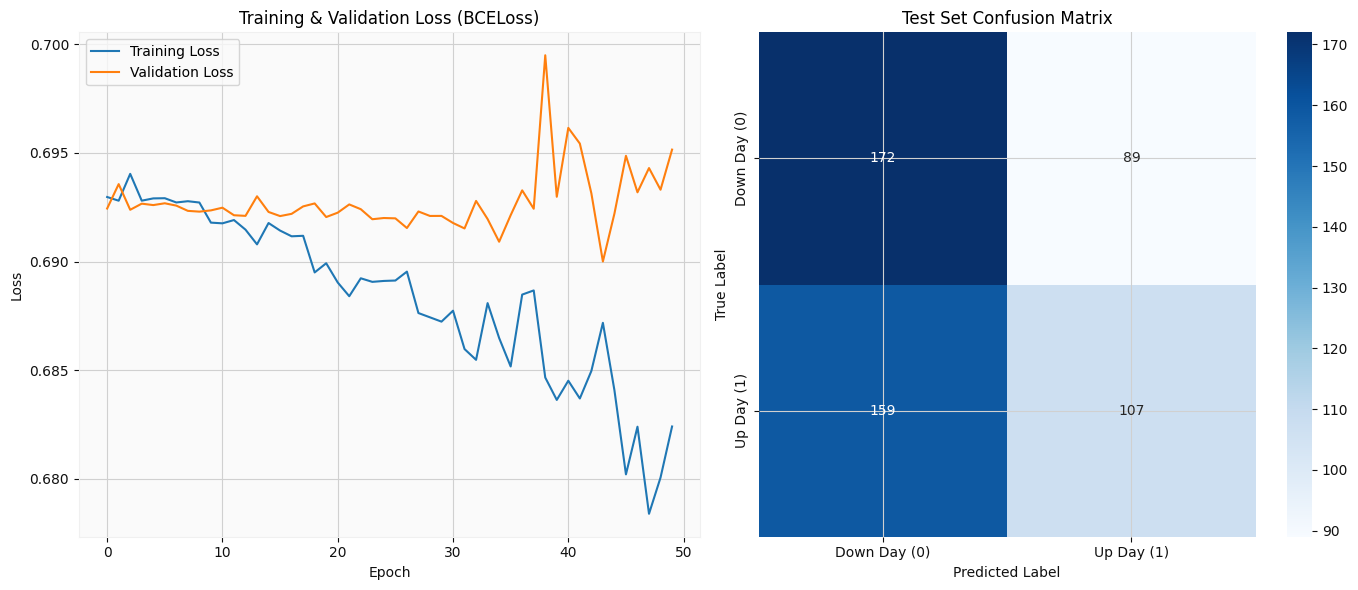

In [146]:
# --- 10. Plot Training History and Confusion Matrix ---

# Plot training & validation loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training & Validation Loss (BCELoss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

- The Bad (Training Log): Look at your "Training & Validation Loss" plot.

- Train Loss (blue) is slowly going down --> model is learning something from the training data.

- Validation Loss (orange) is not going down. It's flat and, after epoch 35, gets noisy and trends up.

- Interpretation: model is not generalizing well. The pattern it's learning in the training set does not (or only weakly) apply to the validation set. It's starting to overfit. The 53% test accuracy might be a lucky fluke of that specific test set, not a robust, learned pattern.

The Bias (Confusion Matrix):

[[172 89]

[159 107]]

- model is heavily biased toward pessimism. It predicted "Down Day" 331 times (172+159) but "Up Day" only 196 times (89+107).

- This is confirmed by the recall scores:

- Recall (Down Day): 0.66 -> It correctly found 66% of all the real "Down Days".

- Recall (Up Day): 0.40 -> It missed 60% of all the real "Up Days" (it called them "Down").

- Interpretation: model is "gun-shy." When in doubt, it predicts "Down."

In [166]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import optuna # <-- Import Optuna
from optuna.trial import TrialState # For pruning


N_STEPS = 60 # 
N_FEATURES = 44 


n_steps = 60 # This is a key hyperparameter. we are choosing 30 previous days

# Create the 3D sequence datasets
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, n_steps)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_scaled, n_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, n_steps)


print("--- Final 3D Shapes ---")
print(f"X_train_seq: {X_train_seq.shape}") # Should be (samples, 30, n_features)
print(f"y_train_seq: {y_train_seq.shape}") # Should be (samples,)

print(f"X_val_seq: {X_val_seq.shape}")
print(f"y_val_seq: {y_val_seq.shape}")

print(f"X_test_seq: {X_test_seq.shape}")
print(f"y_test_seq: {y_test_seq.shape}")


print("--- Data Shapes ---")
print(f"X_train_seq: {X_train_seq.shape}, y_train_seq: {y_train_seq.shape}")
print("-" * 30)

# --- 1. Set Up Device ---
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# --- 2. Create Custom PyTorch Dataset ---
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# --- 3. Define the Stacked LSTM Model (Classifier) ---
# (This class is the same as before)
class StackedLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(StackedLSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_prob if num_layers > 1 else 0
        )
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)
        self.num_layers = num_layers
        self.hidden_size = hidden_size

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        logits = self.fc(out)
        probability = torch.sigmoid(logits)
        return probability

# --- 4. Define the "Objective" Function for Optuna ---
# This function wraps the *entire* training and validation process.

# --- Global constants for the objective ---
INPUT_SIZE = X_train_seq.shape[2] 
OUTPUT_SIZE = 1                   
NUM_EPOCHS = 50 # We can use Early Stopping, so 50 is a max
BATCH_SIZE = 64
PATIENCE = 10   # Early stopping patience

# --- Load data once to be shared by all trials ---
train_dataset = StockDataset(X_train_seq, y_train_seq)
val_dataset = StockDataset(X_val_seq, y_val_seq)
# We don't use the test set for tuning.
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False)


def objective(trial: optuna.trial.Trial) -> float:
    """
    This is the function Optuna will call.
    It builds, trains, and validates one model with one
    set of hyperparameters and returns the final accuracy.
    """
    
    # --- 1. Define Hyperparameters to Tune ---
    # We ask the 'trial' object to *suggest* values
    
    # suggest_categorical is for a list of choices
    HIDDEN_SIZE = trial.suggest_categorical("hidden_size", [64, 128, 256])
    NUM_LAYERS = trial.suggest_categorical("num_layers", [1, 2, 3])
    
    # suggest_float is for a range
    DROPOUT_PROB = trial.suggest_float("dropout_prob", 0.1, 0.5)
    
    # suggest_float (log=True) is for learning rates
    LEARNING_RATE = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    # --- 2. Initialize Model, Loss, and Optimizer ---
    model = StackedLSTM(
        input_size=INPUT_SIZE,
        hidden_size=HIDDEN_SIZE,
        num_layers=NUM_LAYERS,
        output_size=OUTPUT_SIZE,
        dropout_prob=DROPOUT_PROB
    ).to(device)
    
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # --- 3. The Training/Validation Loop ---
    best_val_loss = float('inf')
    epochs_no_improve = 0
    final_val_accuracy = 0.0 # Store the accuracy at the best epoch

    for epoch in range(NUM_EPOCHS):
        model.train()
        for i, (X_batch, y_batch) in enumerate(train_loader):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred_prob = model(X_batch)
            loss = criterion(y_pred_prob, y_batch.unsqueeze(1))
            optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
        
        # --- Validation & Pruning ---
        model.eval()
        epoch_val_loss = 0
        total_correct = 0
        total_samples = 0
        
        with torch.no_grad():
            for X_batch_val, y_batch_val in val_loader:
                X_batch_val, y_batch_val = X_batch_val.to(device), y_batch_val.to(device)
                y_pred_val_prob = model(X_batch_val)
                val_loss = criterion(y_pred_val_prob, y_batch_val.unsqueeze(1))
                epoch_val_loss += val_loss.item()
                
                y_pred_val_class = (y_pred_val_prob > 0.5).float()
                total_samples += y_batch_val.size(0)
                total_correct += (y_pred_val_class == y_batch_val.unsqueeze(1)).sum().item()
        
        avg_val_loss = epoch_val_loss / len(val_loader)
        accuracy = 100 * total_correct / total_samples
        
        # --- Optuna Pruning ---
        # Report the intermediate validation loss to Optuna
        trial.report(avg_val_loss, epoch)
        
        # Check if the trial should be pruned
        if trial.should_prune():
            print(f"--- Trial {trial.number} pruned at epoch {epoch} ---")
            raise optuna.exceptions.TrialPruned()

        # --- Early Stopping Logic ---
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            final_val_accuracy = accuracy # This is the metric we'll return
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            
        if epochs_no_improve == PATIENCE:
            # print(f"Early stopping for trial {trial.number} at epoch {epoch}")
            break
            
    # --- 4. Return the Final Metric to Optimize ---
    # We want to *maximize* the validation accuracy
    # We return the accuracy from the *best* epoch (lowest val_loss)
    return final_val_accuracy


# --- 5. Run the Optuna Study ---
if __name__ == "__main__":
    print("Starting Optuna Hyperparameter Optimization...")
    
    # We want to *maximize* validation accuracy
    study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
    
    # N_TRIALS: How many different models to train.
    # 50-100 is a good start.
    N_TRIALS = 50 
    
    study.optimize(
        objective, 
        n_trials=N_TRIALS, 
        timeout=None # You can set a time limit, e.g., 600 seconds
    )

    print("Optimization finished.")
    print("-" * 30)

    # --- 6. Print the Results ---
    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    print("Study statistics: ")
    print(f"  Number of finished trials: {len(study.trials)}")
    print(f"  Number of pruned trials: {len(pruned_trials)}")
    print(f"  Number of complete trials: {len(complete_trials)}")

    print("Best trial:")
    best_trial = study.best_trial

    print(f"  Value (Maximized Val Accuracy): {best_trial.value:.2f}%")

    print("  Best Hyperparameters:")
    for key, value in best_trial.params.items():
        print(f"    {key}: {value}")

[I 2025-11-16 19:09:44,704] A new study created in memory with name: no-name-bab2b292-a214-44a3-a283-0a9af307a0d8


--- Final 3D Shapes ---
X_train_seq: (2539, 60, 44)
y_train_seq: (2539,)
X_val_seq: (497, 60, 44)
y_val_seq: (497,)
X_test_seq: (497, 60, 44)
y_test_seq: (497,)
--- Data Shapes ---
X_train_seq: (2539, 60, 44), y_train_seq: (2539,)
------------------------------
Using device: mps
Starting Optuna Hyperparameter Optimization...


[I 2025-11-16 19:10:01,586] Trial 0 finished with value: 52.313883299798796 and parameters: {'hidden_size': 128, 'num_layers': 1, 'dropout_prob': 0.23666831739395572, 'learning_rate': 0.0018173108313052464}. Best is trial 0 with value: 52.313883299798796.
[I 2025-11-16 19:10:18,517] Trial 1 finished with value: 52.51509054325956 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout_prob': 0.24931920134257068, 'learning_rate': 0.000803921487854181}. Best is trial 1 with value: 52.51509054325956.
[I 2025-11-16 19:10:29,062] Trial 2 finished with value: 52.313883299798796 and parameters: {'hidden_size': 64, 'num_layers': 3, 'dropout_prob': 0.17627128510154863, 'learning_rate': 0.0007649787314699514}. Best is trial 1 with value: 52.51509054325956.
[I 2025-11-16 19:10:47,939] Trial 3 finished with value: 51.10663983903421 and parameters: {'hidden_size': 64, 'num_layers': 2, 'dropout_prob': 0.4647900904901296, 'learning_rate': 0.000892561448855138}. Best is trial 1 with value: 52.51

--- Trial 5 pruned at epoch 6 ---


[I 2025-11-16 19:11:10,508] Trial 6 finished with value: 51.10663983903421 and parameters: {'hidden_size': 64, 'num_layers': 3, 'dropout_prob': 0.31225442948660176, 'learning_rate': 0.009646390236408096}. Best is trial 1 with value: 52.51509054325956.
[I 2025-11-16 19:11:30,208] Trial 7 finished with value: 51.7102615694165 and parameters: {'hidden_size': 256, 'num_layers': 2, 'dropout_prob': 0.21515483917746003, 'learning_rate': 0.00012403810163546153}. Best is trial 1 with value: 52.51509054325956.
[I 2025-11-16 19:11:34,032] Trial 8 pruned. 


--- Trial 8 pruned at epoch 6 ---


[I 2025-11-16 19:11:47,431] Trial 9 pruned. 


--- Trial 9 pruned at epoch 24 ---


[I 2025-11-16 19:12:01,328] Trial 10 finished with value: 53.118712273641854 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout_prob': 0.427493621747332, 'learning_rate': 0.0029111132849001615}. Best is trial 10 with value: 53.118712273641854.
[I 2025-11-16 19:12:14,618] Trial 11 pruned. 


--- Trial 11 pruned at epoch 24 ---


[I 2025-11-16 19:12:22,642] Trial 12 finished with value: 51.91146881287727 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout_prob': 0.10640003354037014, 'learning_rate': 0.00033983282048573787}. Best is trial 10 with value: 53.118712273641854.
[I 2025-11-16 19:12:46,480] Trial 13 finished with value: 53.521126760563384 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout_prob': 0.38918039688146244, 'learning_rate': 0.003168283960480074}. Best is trial 13 with value: 53.521126760563384.
[I 2025-11-16 19:13:02,424] Trial 14 finished with value: 51.7102615694165 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout_prob': 0.39497986113311084, 'learning_rate': 0.003381424069066203}. Best is trial 13 with value: 53.521126760563384.
[I 2025-11-16 19:13:03,033] Trial 15 pruned. 


--- Trial 15 pruned at epoch 0 ---


[I 2025-11-16 19:13:24,956] Trial 16 finished with value: 50.70422535211268 and parameters: {'hidden_size': 128, 'num_layers': 1, 'dropout_prob': 0.392222434387224, 'learning_rate': 0.0017035762245863246}. Best is trial 13 with value: 53.521126760563384.
[I 2025-11-16 19:13:48,689] Trial 17 finished with value: 52.313883299798796 and parameters: {'hidden_size': 256, 'num_layers': 2, 'dropout_prob': 0.4315609313380843, 'learning_rate': 0.0017060940441927374}. Best is trial 13 with value: 53.521126760563384.
[I 2025-11-16 19:13:49,310] Trial 18 pruned. 


--- Trial 18 pruned at epoch 0 ---


[I 2025-11-16 19:13:55,270] Trial 19 finished with value: 51.30784708249497 and parameters: {'hidden_size': 128, 'num_layers': 1, 'dropout_prob': 0.4375200804333337, 'learning_rate': 0.009747153843000919}. Best is trial 13 with value: 53.521126760563384.
[I 2025-11-16 19:13:56,251] Trial 20 pruned. 


--- Trial 20 pruned at epoch 0 ---


[I 2025-11-16 19:14:07,755] Trial 21 finished with value: 51.30784708249497 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout_prob': 0.26400981405570034, 'learning_rate': 0.0004507068249318845}. Best is trial 13 with value: 53.521126760563384.
[I 2025-11-16 19:14:08,386] Trial 22 pruned. 


--- Trial 22 pruned at epoch 0 ---


[I 2025-11-16 19:14:08,997] Trial 23 pruned. 


--- Trial 23 pruned at epoch 0 ---


[I 2025-11-16 19:14:30,634] Trial 24 finished with value: 52.91750503018109 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout_prob': 0.4060009430307684, 'learning_rate': 0.00116278286616838}. Best is trial 13 with value: 53.521126760563384.
[I 2025-11-16 19:14:55,837] Trial 25 finished with value: 50.70422535211268 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout_prob': 0.4090476214050649, 'learning_rate': 0.0012761829346361123}. Best is trial 13 with value: 53.521126760563384.
[I 2025-11-16 19:15:13,600] Trial 26 finished with value: 54.32595573440644 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout_prob': 0.4622316252397222, 'learning_rate': 0.003503939139895475}. Best is trial 26 with value: 54.32595573440644.
[I 2025-11-16 19:15:33,427] Trial 27 finished with value: 54.72837022132797 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout_prob': 0.46042873761691194, 'learning_rate': 0.0033798265182905405}. Best is trial 27 with value:

--- Trial 28 pruned at epoch 0 ---


[I 2025-11-16 19:15:34,967] Trial 29 pruned. 


--- Trial 29 pruned at epoch 0 ---


[I 2025-11-16 19:15:35,398] Trial 30 pruned. 


--- Trial 30 pruned at epoch 0 ---


[I 2025-11-16 19:15:36,014] Trial 31 pruned. 


--- Trial 31 pruned at epoch 0 ---


[I 2025-11-16 19:15:36,730] Trial 32 pruned. 


--- Trial 32 pruned at epoch 0 ---


[I 2025-11-16 19:15:37,347] Trial 33 pruned. 


--- Trial 33 pruned at epoch 0 ---


[I 2025-11-16 19:15:37,992] Trial 34 pruned. 


--- Trial 34 pruned at epoch 0 ---


[I 2025-11-16 19:15:48,978] Trial 35 finished with value: 51.91146881287727 and parameters: {'hidden_size': 64, 'num_layers': 2, 'dropout_prob': 0.4548644701755048, 'learning_rate': 0.00195419287859246}. Best is trial 27 with value: 54.72837022132797.
[I 2025-11-16 19:15:49,593] Trial 36 pruned. 


--- Trial 36 pruned at epoch 0 ---


[I 2025-11-16 19:16:09,327] Trial 37 finished with value: 51.10663983903421 and parameters: {'hidden_size': 128, 'num_layers': 3, 'dropout_prob': 0.38289144528678287, 'learning_rate': 0.0052065985867352955}. Best is trial 27 with value: 54.72837022132797.
[I 2025-11-16 19:16:09,972] Trial 38 pruned. 


--- Trial 38 pruned at epoch 0 ---


[I 2025-11-16 19:16:11,379] Trial 39 pruned. 


--- Trial 39 pruned at epoch 0 ---


[I 2025-11-16 19:16:12,078] Trial 40 pruned. 


--- Trial 40 pruned at epoch 0 ---


[I 2025-11-16 19:16:12,717] Trial 41 pruned. 


--- Trial 41 pruned at epoch 0 ---


[I 2025-11-16 19:16:13,359] Trial 42 pruned. 


--- Trial 42 pruned at epoch 0 ---


[I 2025-11-16 19:16:13,992] Trial 43 pruned. 


--- Trial 43 pruned at epoch 0 ---


[I 2025-11-16 19:16:14,566] Trial 44 pruned. 


--- Trial 44 pruned at epoch 0 ---


[I 2025-11-16 19:16:15,204] Trial 45 pruned. 


--- Trial 45 pruned at epoch 0 ---


[I 2025-11-16 19:16:15,847] Trial 46 pruned. 


--- Trial 46 pruned at epoch 0 ---


[I 2025-11-16 19:16:35,260] Trial 47 pruned. 


--- Trial 47 pruned at epoch 40 ---


[I 2025-11-16 19:16:35,895] Trial 48 pruned. 


--- Trial 48 pruned at epoch 0 ---


[I 2025-11-16 19:16:36,509] Trial 49 pruned. 


--- Trial 49 pruned at epoch 0 ---
Optimization finished.
------------------------------
Study statistics: 
  Number of finished trials: 50
  Number of pruned trials: 29
  Number of complete trials: 21
Best trial:
  Value (Maximized Val Accuracy): 54.73%
  Best Hyperparameters:
    hidden_size: 128
    num_layers: 2
    dropout_prob: 0.46042873761691194
    learning_rate: 0.0033798265182905405
